In [28]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from skimage.color import rgb2gray

In [29]:
X = np.load('D:/STUDY/Fouth Year/GP/test/our_images.npz')
Y = np.load('D:/STUDY/Fouth Year/GP/test/target.npy')
new_x = []
new_y = []

In [30]:
def inserting(path):
        img = Image.open(path) 
        if img.mode != 'RGB':
            img = img.convert('RGB')
        resized_photo = img.resize((90, 90))      
        img_np_array = np.array(resized_photo)
        gray_image = rgb2gray(img_np_array)
        gray_image = np.expand_dims(gray_image, axis=-1)
        real_photo = gray_image.astype(np.float32) / 255. 
        new_x.append(real_photo)
        directory, filename = os.path.split(path)
        subject_id, etc = filename.split('__')
        gender, lr, finger, _ = etc.split('_')
        gender = 0 if gender == 'M' else 1
        lr = 0 if lr =='L' else 1
        
        if finger == 'Thumb':
            finger = 0
        elif finger == 'Index':
            finger = 1
        elif finger == 'Middle':
            finger = 2
        elif finger == 'Ring':
            finger = 3
        elif finger == 'Little':
            finger = 4
        new_y.append([subject_id, gender, lr, finger])


In [31]:
inserting("D:/STUDY/Fouth Year/GP/test/Ibrahim/1__M_Left_Index_finger.bmp")
# path = "D:/STUDY/Fouth Year/GP/test/Ibrahim/1__M_Left_index_finger.bmp"
# directory, filename = os.path.split(path)
# print(filename)

In [37]:
print(new_x[0].squeeze(),cmap='gray')

TypeError: 'cmap' is an invalid keyword argument for print()

In [35]:
new_x = np.array(new_x)
new_y = np.array(new_y)

In [39]:
X =np.concatenate((X, new_x))
Y =np.concatenate((Y, new_y))


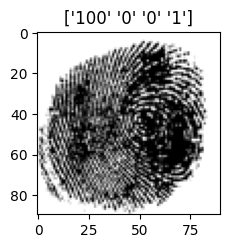

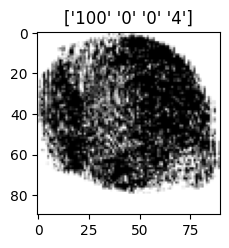

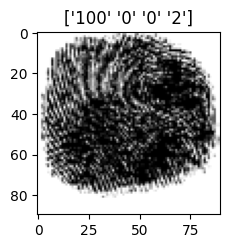

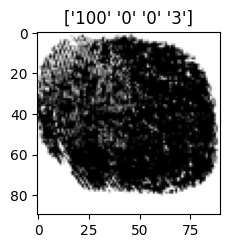

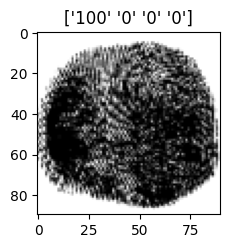

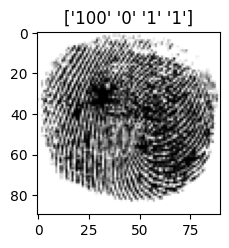

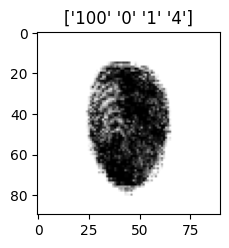

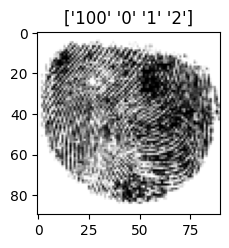

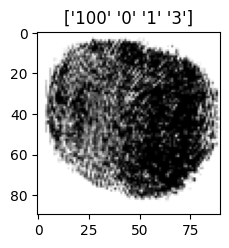

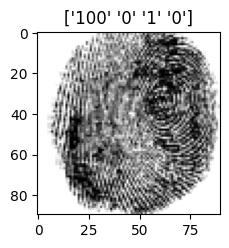

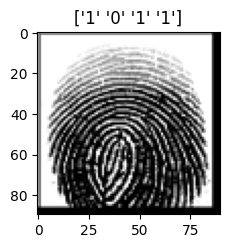

In [41]:
for i in range(len(X)):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 2)
    plt.title(Y[i])
    plt.imshow(X[i].squeeze(),cmap='gray')